<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_24_Bar_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-12-10 00:47:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M   137MB/s    in 1.1s    

2025-12-10 00:47:28 (137 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#**STEP 0: DATA CLEANING AND PREPPING**

In [4]:
# Inspect columns in the lab

cols_to_check = [
    "ConvertedCompYearly",
    "Age",
    "JobSatPoints_6",
    "JobSatPoints_7",
    "MainBranch",
    "LanguageWantToWorkWith",
    "DatabaseHaveWorkedWith",
    "Country"
]

for col in cols_to_check:
    print(f"\n===== {col} =====")
    print("Sample values:")
    print(df[col].head(10))
    print("\nUnique count:", df[col].nunique(dropna=False))
    print("-" * 50)



===== ConvertedCompYearly =====
Sample values:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: ConvertedCompYearly, dtype: float64

Unique count: 6114
--------------------------------------------------

===== Age =====
Sample values:
0    Under 18 years old
1       35-44 years old
2       45-54 years old
3       18-24 years old
4       18-24 years old
5    Under 18 years old
6       35-44 years old
7       18-24 years old
8       45-54 years old
9       35-44 years old
Name: Age, dtype: object

Unique count: 8
--------------------------------------------------

===== JobSatPoints_6 =====
Sample values:
0    NaN
1    0.0
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: JobSatPoints_6, dtype: float64

Unique count: 94
--------------------------------------------------

===== JobSatPoints_7 =====
Sample values:
0    NaN
1    0.0
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: JobSatPoints_7, 

In [5]:
# Clean ConvertedCompYearly

# Keep only numeric values
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop missing compensation
df_comp = df.dropna(subset=["ConvertedCompYearly"]).copy()

# Remove outliers using IQR
Q1 = df_comp["ConvertedCompYearly"].quantile(0.25)
Q3 = df_comp["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_comp_clean = df_comp[
    (df_comp["ConvertedCompYearly"] >= lower_bound) &
    (df_comp["ConvertedCompYearly"] <= upper_bound)
].copy()

df_comp_clean.head(), df_comp_clean.shape


(     ResponseId                                         MainBranch  \
 72           73                     I am a developer by profession   
 374         375  I am not primarily a developer, but I write co...   
 379         380                     I am a developer by profession   
 385         386                     I am a developer by profession   
 389         390                     I am a developer by profession   
 
                  Age                                         Employment  \
 72   18-24 years old  Employed, full-time;Student, full-time;Indepen...   
 374  25-34 years old                                Employed, full-time   
 379  35-44 years old                                Employed, full-time   
 385  35-44 years old  Independent contractor, freelancer, or self-em...   
 389  25-34 years old             Employed, full-time;Student, part-time   
 
                                RemoteWork   Check  \
 72   Hybrid (some remote, some in-person)  Apples   
 374  

In [6]:
# Clean and map Age to numeric values

age_mapping = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

df["Age_numeric"] = df["Age"].map(age_mapping)

df[["Age", "Age_numeric"]].head(20)


,Age,Age_numeric
0,Under 18 years old,15.0
1,35-44 years old,40.0
2,45-54 years old,50.0
3,18-24 years old,21.0
4,18-24 years old,21.0
5,Under 18 years old,15.0
6,35-44 years old,40.0
7,18-24 years old,21.0
8,45-54 years old,50.0
9,35-44 years old,40.0


In [8]:
# Clean JobSatPoints_6 and JobSatPoints_7

# Convert to numeric safely
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")
df["JobSatPoints_7"] = pd.to_numeric(df["JobSatPoints_7"], errors="coerce")

# Remove invalid values (0, <1, >5)
def clean_satisfaction(col):
    df[col] = df[col].apply(lambda x: x if (pd.isna(x) or 1 <= x <= 5) else None)

clean_satisfaction("JobSatPoints_6")
clean_satisfaction("JobSatPoints_7")

df[["JobSatPoints_6", "JobSatPoints_7"]].head(50)


,JobSatPoints_6,JobSatPoints_7
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [9]:
df["JobSatPoints_6"].value_counts(dropna=False).head(10)


,count
JobSatPoints_6,
NaN,64578
5.0,706
2.0,43
1.0,43
3.0,40
4.0,27


In [10]:
df["JobSatPoints_7"].value_counts(dropna=False).head(10)


,count
JobSatPoints_7,
NaN,64173
5.000,1071
1.000,56
3.000,52
4.000,47
2.000,37
3.125,1


In [11]:
# Step 5: Clean MainBranch

# Convert to string and strip spaces
df["MainBranch"] = df["MainBranch"].astype(str).str.strip()

# Replace long survey text with shorter clean labels
df["MainBranch"] = df["MainBranch"].replace({
    "I am a developer by profession": "Developer",
    "I code primarily as a hobby": "Hobbyist",
    "I am learning to code": "Learning to code",
    "I am not primarily a developer, but I write code sometimes": "Non-developer coder",
    # Sometimes there are variations; clean them too:
    "I am not primarily a developer, but I write code sometimes": "Non-developer coder",
    "I am a developer by profession ": "Developer",  # trailing spaces version
})

# Replace meaningless values with NaN
df["MainBranch"] = df["MainBranch"].replace(["nan", "None", ""], pd.NA)

# Show final distribution
df["MainBranch"].value_counts(dropna=False)


,count
MainBranch,
Developer,50207
"I am not primarily a developer, but I write code sometimes as part of my work/studies",6511
Learning to code,3875
Hobbyist,3334
"I used to be a developer by profession, but no longer am",1510


In [12]:
# Additional label cleanup for remaining long entries

df["MainBranch"] = df["MainBranch"].replace({
    "I am not primarily a developer, but I write code sometimes as part of my work/studies":
        "Non-developer coder",
    "I used to be a developer by profession, but no longer am":
        "Former developer"
})

df["MainBranch"].value_counts(dropna=False)


,count
MainBranch,
Developer,50207
Non-developer coder,6511
Learning to code,3875
Hobbyist,3334
Former developer,1510


In [13]:
# Step 6: Clean LanguageWantToWorkWith

# Create a copy to avoid modifying original
df_lang = df[["LanguageWantToWorkWith"]].copy()

# Replace NaN-like strings
df_lang["LanguageWantToWorkWith"] = df_lang["LanguageWantToWorkWith"].replace(["nan", "None", ""], pd.NA)

# Split multi-select values into lists
df_lang["LanguageList"] = df_lang["LanguageWantToWorkWith"].str.split(";")

# Drop rows where the split resulted in NaN
df_lang = df_lang.dropna(subset=["LanguageList"])

# Explode into one row per language
df_lang_exploded = df_lang.explode("LanguageList")

# Strip whitespace
df_lang_exploded["LanguageList"] = df_lang_exploded["LanguageList"].str.strip()

# Remove empty strings after stripping
df_lang_exploded = df_lang_exploded[df_lang_exploded["LanguageList"] != ""]

# Count languages
language_counts = df_lang_exploded["LanguageList"].value_counts()

language_counts.head(15)


,count
LanguageList,
Python,25047
JavaScript,23774
SQL,22400
HTML/CSS,20721
TypeScript,20239
Rust,17232
Go,13837
Bash/Shell (all shells),13744
C#,12921


In [14]:
# Step 7: Clean DatabaseHaveWorkedWith

# Select only this column
df_db = df[["DatabaseHaveWorkedWith"]].copy()

# Remove placeholder values
df_db["DatabaseHaveWorkedWith"] = df_db["DatabaseHaveWorkedWith"].replace(["nan", "None", ""], pd.NA)

# Split multi-select
df_db["DB_List"] = df_db["DatabaseHaveWorkedWith"].str.split(";")

# Drop rows where list is NaN
df_db = df_db.dropna(subset=["DB_List"])

# Explode into one row per database
df_db_exploded = df_db.explode("DB_List")

# Strip whitespace
df_db_exploded["DB_List"] = df_db_exploded["DB_List"].str.strip()

# Remove empty strings after stripping
df_db_exploded = df_db_exploded[df_db_exploded["DB_List"] != ""]

# Count database usage
db_counts = df_db_exploded["DB_List"].value_counts()

db_counts.head(15)


,count
DB_List,
PostgreSQL,25536
MySQL,21099
SQLite,17365
Microsoft SQL Server,13275
MongoDB,13007
Redis,10463
MariaDB,8991
Elasticsearch,6533
Oracle,5273


In [15]:
# Step 8: Clean Country

df["Country"] = df["Country"].astype(str).str.strip()

df["Country"] = df["Country"].replace(["nan", "None", ""], pd.NA)

country_counts = df["Country"].value_counts()

country_counts.head(20)


,count
Country,
United States of America,11095
Germany,4947
India,4231
United Kingdom of Great Britain and Northern Ireland,3224
Ukraine,2672
France,2110
Canada,2104
Poland,1534
Netherlands,1449


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



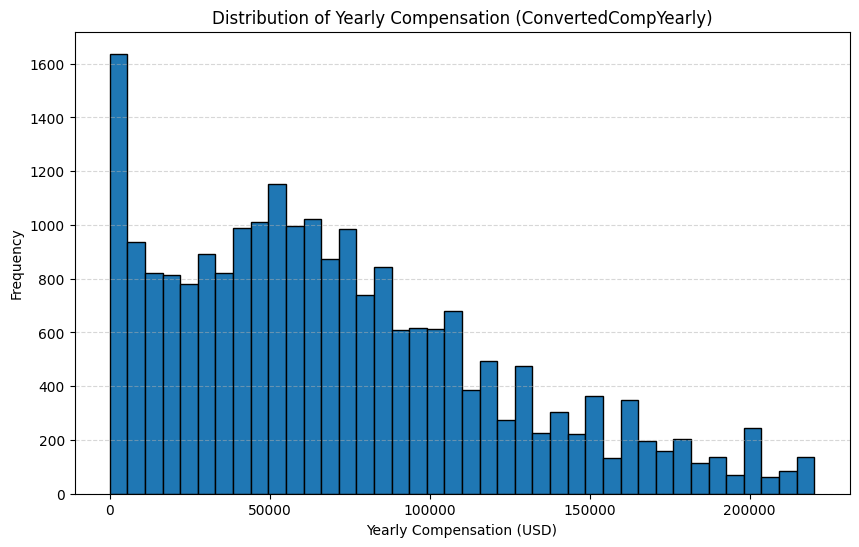

In [16]:
## Write your code here
# Task 1.1: Histogram of ConvertedCompYearly

plt.figure(figsize=(10,6))
plt.hist(df_comp_clean["ConvertedCompYearly"], bins=40, edgecolor="black")
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



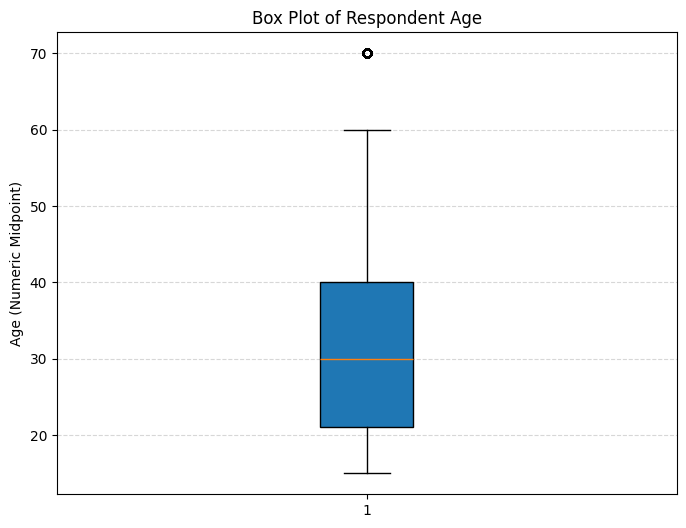

In [17]:
## Write your code here
# Task 1.2: Box Plot of Age

plt.figure(figsize=(8,6))
plt.boxplot(df["Age_numeric"].dropna(), vert=True, patch_artist=True)

plt.title("Box Plot of Respondent Age")
plt.ylabel("Age (Numeric Midpoint)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



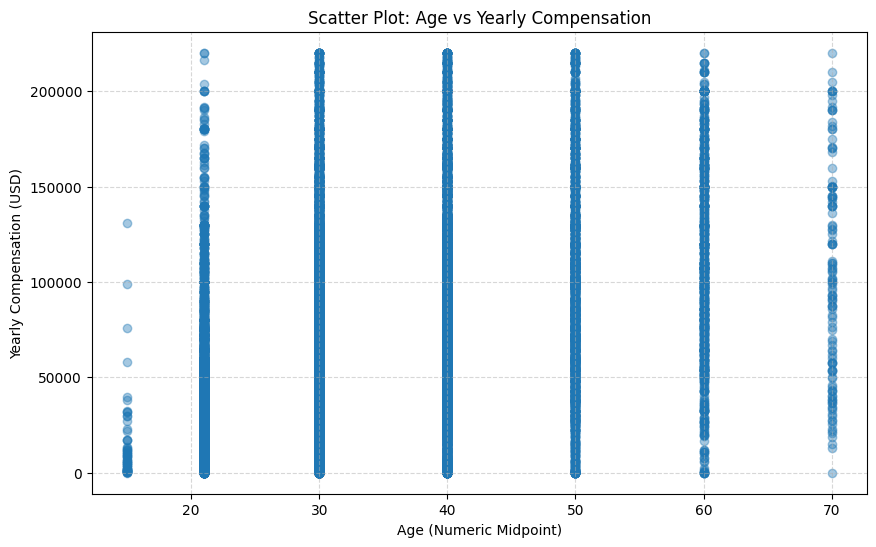

In [20]:
## Write your code here
# Task 2.1: Scatter Plot of Age vs Compensation

# Rebuild df_comp_clean to include Age_numeric

df_comp_temp = df.dropna(subset=["ConvertedCompYearly", "Age_numeric"]).copy()

Q1 = df_comp_temp["ConvertedCompYearly"].quantile(0.25)
Q3 = df_comp_temp["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_comp_clean = df_comp_temp[
    (df_comp_temp["ConvertedCompYearly"] >= lower_bound) &
    (df_comp_temp["ConvertedCompYearly"] <= upper_bound)
].copy()

df_comp_clean[["Age_numeric", "ConvertedCompYearly"]].head(), df_comp_clean.shape

# Plot graph
plt.figure(figsize=(10,6))

plt.scatter(
    df_comp_clean["Age_numeric"],
    df_comp_clean["ConvertedCompYearly"],
    alpha=0.4
)

plt.title("Scatter Plot: Age vs Yearly Compensation")
plt.xlabel("Age (Numeric Midpoint)")
plt.ylabel("Yearly Compensation (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


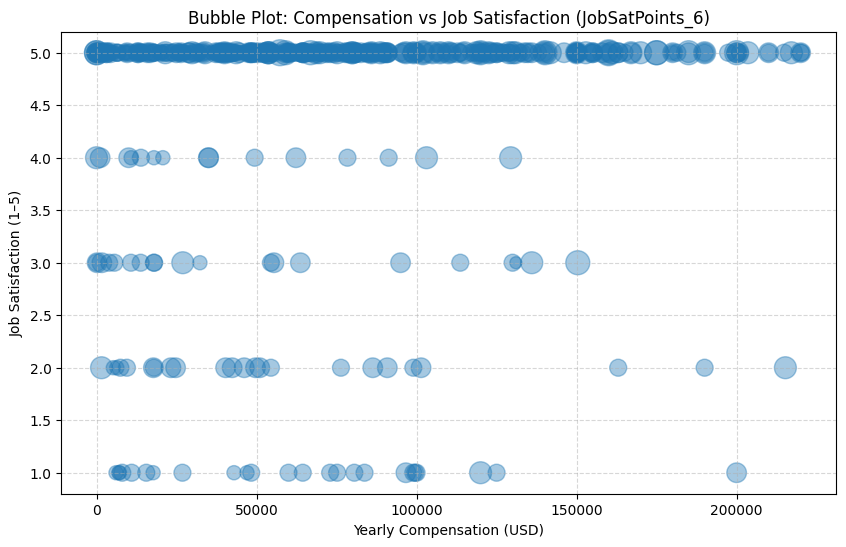

In [21]:
## Write your code here
# Task 2.2: Bubble Plot - Compensation vs Job Satisfaction, bubble size = Age

# Keep only rows with JobSatPoints_6
df_bubble = df_comp_clean.dropna(subset=["JobSatPoints_6"]).copy()

plt.figure(figsize=(10,6))

plt.scatter(
    df_bubble["ConvertedCompYearly"],
    df_bubble["JobSatPoints_6"],
    s=df_bubble["Age_numeric"] * 5,   # bubble size scaled by age
    alpha=0.4
)

plt.title("Bubble Plot: Compensation vs Job Satisfaction (JobSatPoints_6)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (1–5)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



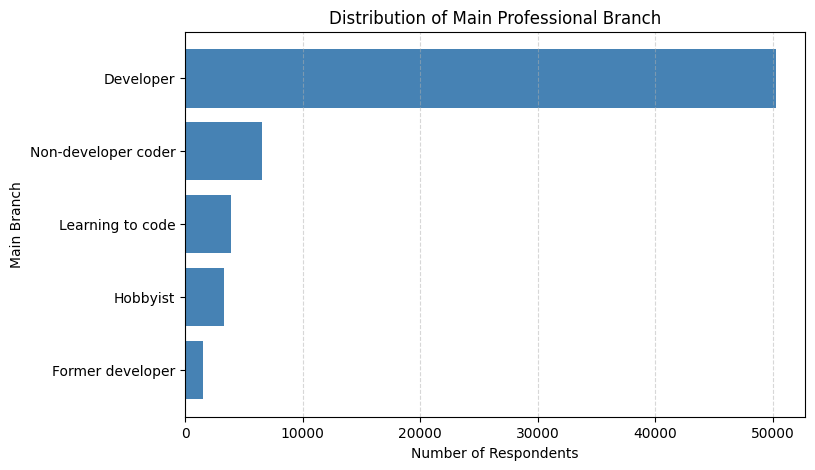

In [22]:
## Write your code here
# Task 3.1 - Horizontal Bar Chart of MainBranch Distribution

mainbranch_counts = df["MainBranch"].value_counts()

plt.figure(figsize=(8,5))
plt.barh(mainbranch_counts.index, mainbranch_counts.values, color="steelblue")
plt.title("Distribution of Main Professional Branch")
plt.xlabel("Number of Respondents")
plt.ylabel("Main Branch")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.gca().invert_yaxis()  # largest at top
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



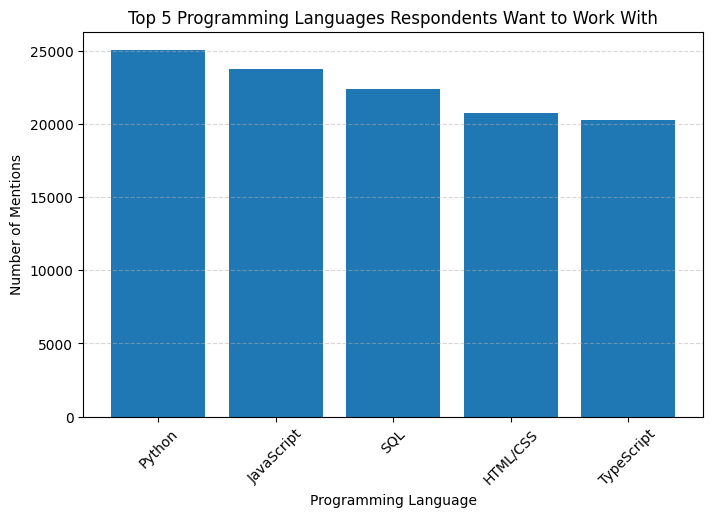

In [23]:
## Write your code here
# Task 3.2: Top 5 languages respondents want to work with

top5_lang = language_counts.head(5)

plt.figure(figsize=(8,5))
plt.bar(top5_lang.index, top5_lang.values)
plt.title("Top 5 Programming Languages Respondents Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


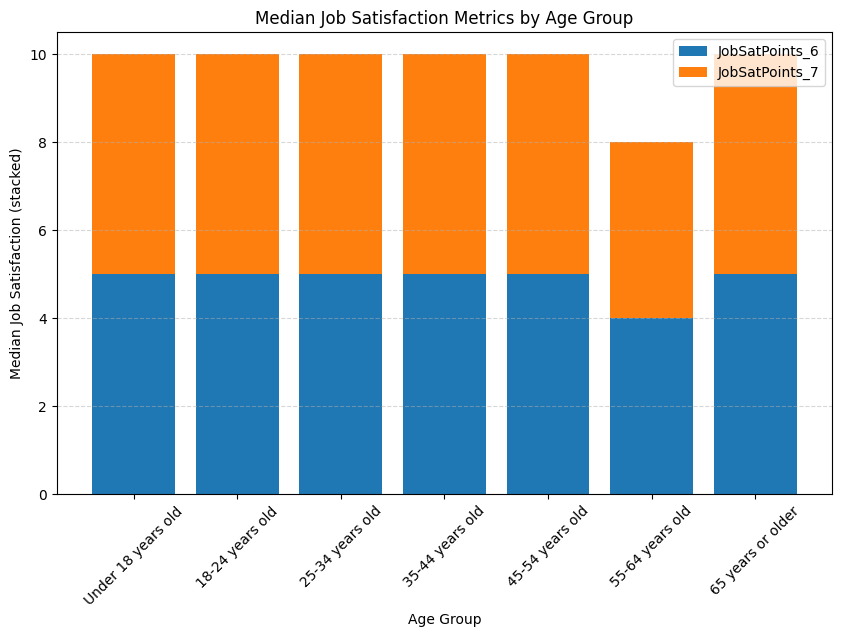

In [24]:
## Write your code here
# Task 3.3: Stacked bar of median JobSatPoints_6 and _7 by Age group

df_js = df.dropna(subset=["Age", "JobSatPoints_6", "JobSatPoints_7"]).copy()

median_js = df_js.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Sort age groups in logical order using Age_numeric
age_order = df[["Age", "Age_numeric"]].drop_duplicates().dropna()
age_order = age_order.sort_values("Age_numeric")["Age"].tolist()
median_js = median_js.reindex(age_order)

plt.figure(figsize=(10,6))
plt.bar(median_js.index, median_js["JobSatPoints_6"], label="JobSatPoints_6")
plt.bar(median_js.index, median_js["JobSatPoints_7"],
        bottom=median_js["JobSatPoints_6"], label="JobSatPoints_7")

plt.title("Median Job Satisfaction Metrics by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction (stacked)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



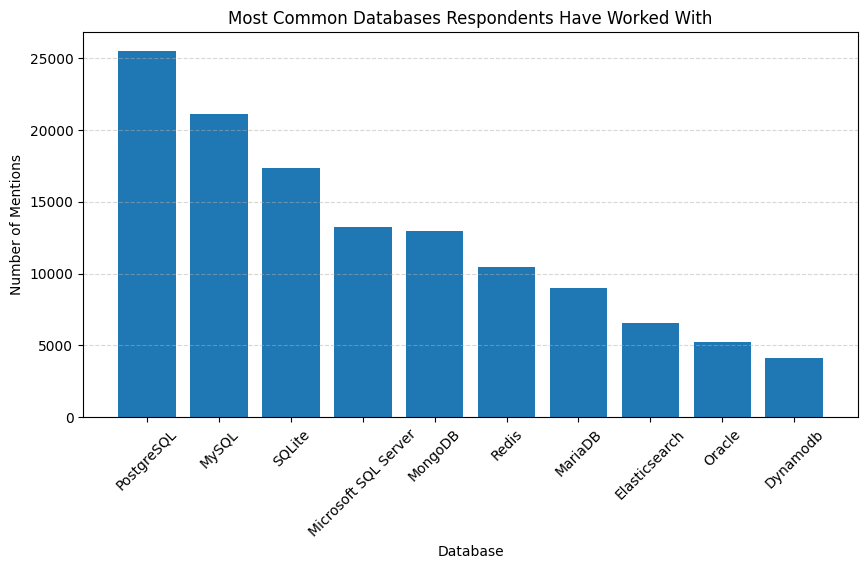

In [25]:
## Write your code here
# Task 3.4: Database popularity (top 10)

top_db = db_counts.head(10)

plt.figure(figsize=(10,5))
plt.bar(top_db.index, top_db.values)
plt.title("Most Common Databases Respondents Have Worked With")
plt.xlabel("Database")
plt.ylabel("Number of Mentions")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



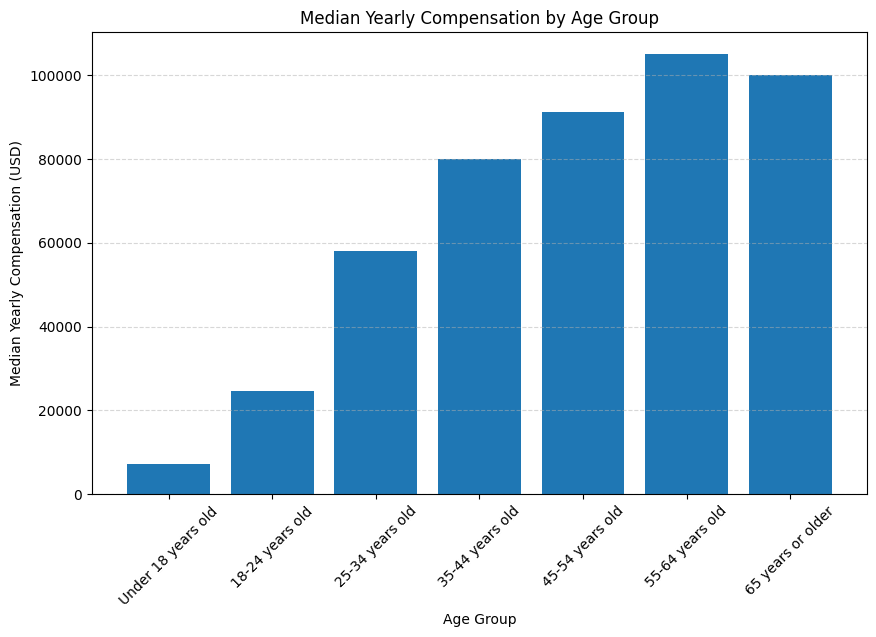

In [26]:
## Write your code here
# Task 4.1: Median compensation by age group

df_age_comp = df_comp_clean.dropna(subset=["Age"]).copy()
median_comp_by_age = df_age_comp.groupby("Age")["ConvertedCompYearly"].median()

# Sort by age order again
median_comp_by_age = median_comp_by_age.reindex(age_order)

plt.figure(figsize=(10,6))
plt.bar(median_comp_by_age.index, median_comp_by_age.values)
plt.title("Median Yearly Compensation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation (USD)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



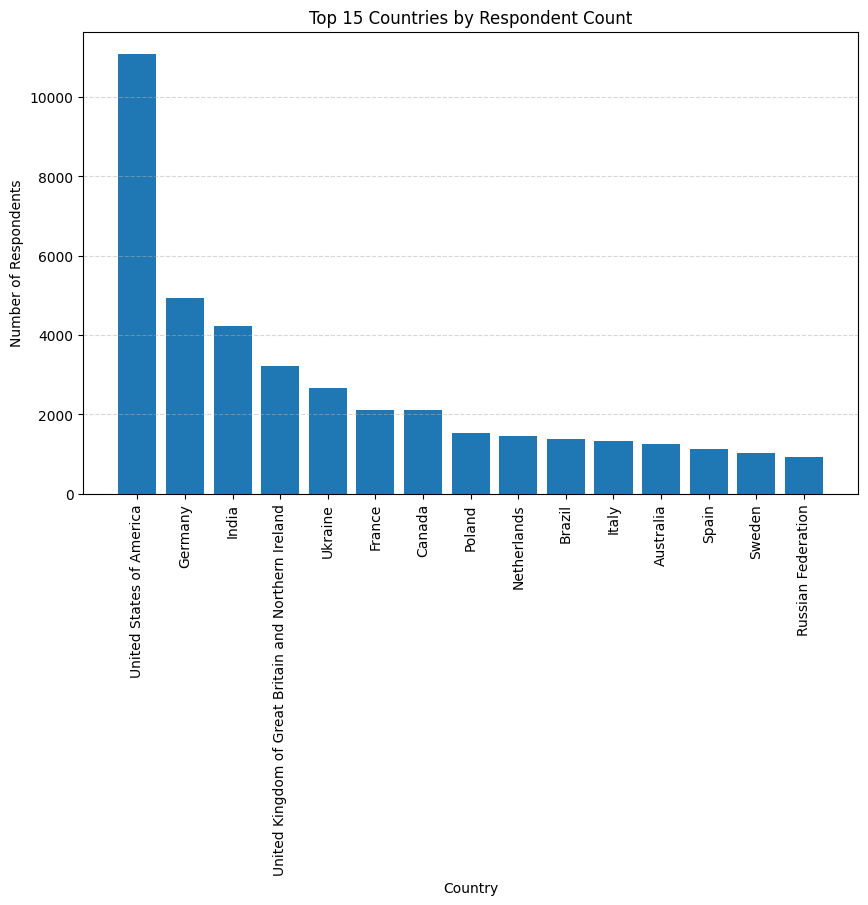

In [27]:
## Write your code here
# Task 4.2: Respondent count by country (top 15)

top_countries = country_counts.head(15)

plt.figure(figsize=(10,6))
plt.bar(top_countries.index, top_countries.values)
plt.title("Top 15 Countries by Respondent Count")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


#**PERSONAL INSIGHTS**
##**Summary Paragraph**

In this lab, I explored data distributions, relationships, composition patterns, and comparisons within the Stack Overflow developer survey using bar charts and related visualizations. After thoroughly cleaning the dataset — including compensation values, age groups, job satisfaction metrics, multi-select language and database fields, and categorical variables — I generated a variety of visual charts to better understand trends in respondent behavior. The results reveal how developers differ across age, compensation, language preferences, database experience, and country. Together, these visualizations provide a clear picture of the global developer landscape and highlight meaningful relationships between experience, skills, and professional profiles.

Across all visualizations, several consistent patterns emerge. The compensation histogram shows a heavily right-skewed distribution, with most developers earning under USD100,000 but a long tail of higher salaries extending beyond USD200,000. The age box plot reflects the dataset’s youthful central tendency, with most respondents concentrated between 21 and 40, though older groups remain represented.

The relationship charts reinforce intuitive trends: the scatter plot demonstrates that compensation generally increases with age, peaking in mid-career ranges. The bubble plot reveals that job satisfaction scores tend to cluster at the higher end (4–5), regardless of compensation, suggesting that satisfaction in this sample may be influenced more by workplace environment or role fit than salary alone.

Composition charts show clear preferences and patterns across the developer community. The majority identify as professional developers, followed by hobbyists and learners. Programming language popularity is dominated by Python, JavaScript, SQL, HTML/CSS, and TypeScript — a familiar hierarchy in modern development. Database experience follows a similar pattern, with PostgreSQL, MySQL, SQLite, SQL Server, and MongoDB emerging as the dominant technologies.

Comparative bar charts reveal structural trends in the workforce. Median compensation increases steadily with age, peaking at 55–64 years old before slightly declining for older respondents. Geographically, the dataset is heavily concentrated in the United States, Germany, India, and the United Kingdom, reflecting where the survey is most widely adopted.

Together, these insights depict a global developer population that is young, highly satisfied, increasingly full-stack, and reliant on a core set of languages and databases. The visual analysis highlights how age, geography, and skill preferences shape the professional landscape of modern software development.

## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
